In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

# Seq-LM-EMD

In [2]:
from src.models.model import Seq_LM_EMD

In [3]:
model = Seq_LM_EMD(
    model="sentence-transformers/distiluse-base-multilingual-cased-v2", 
    tokenizer="sentence-transformers/distiluse-base-multilingual-cased-v2", 
    dist_type="seq",
    reg1=0.2, 
    reg2=0.2,
    nit=100
)

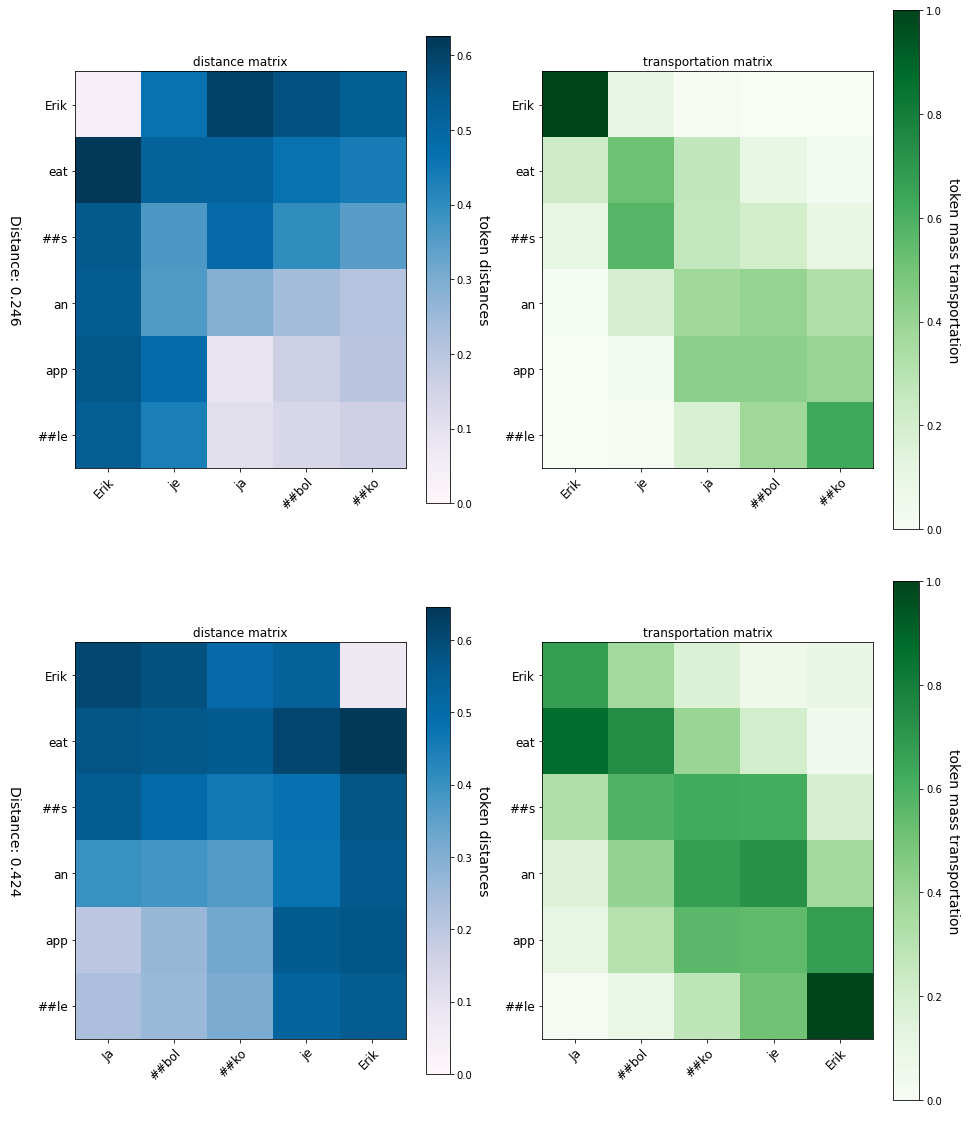

In [4]:
system_text = "Erik eats an apple"
references = [
    "Erik je jabolko",
    "Jabolko je Erik",
]
model.visualize(system_text, references)

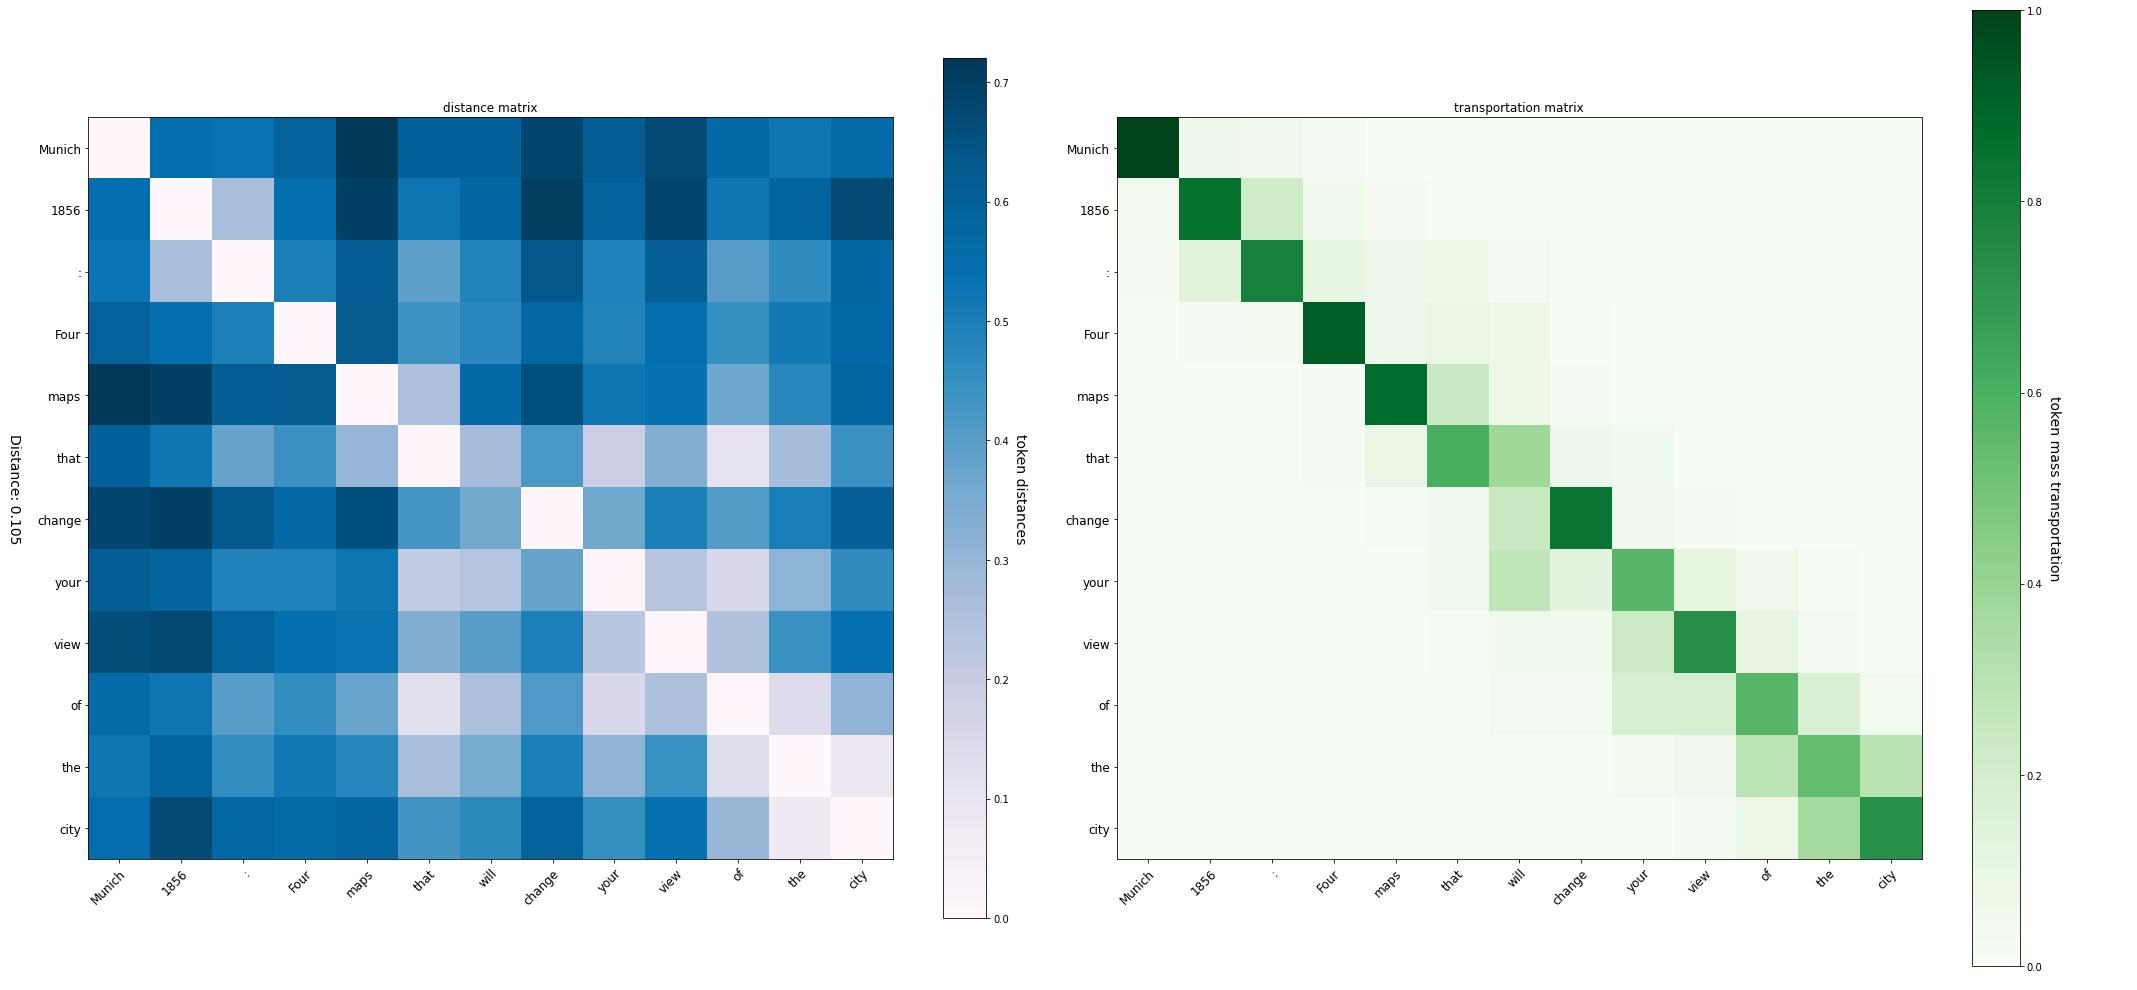

In [5]:
system_text = 'Munich 1856: Four maps that change your view of the city'
references = ['Munich 1856: Four maps that will change your view of the city']
model.visualize(system_text, references)

In [6]:
from src.data.WMT18 import WMT18

In [7]:
datasets = WMT18("de-en", only_hybrid=True, batch_size=1)
datasets.setup()

In [8]:
dataloader = datasets.test_dataloader()

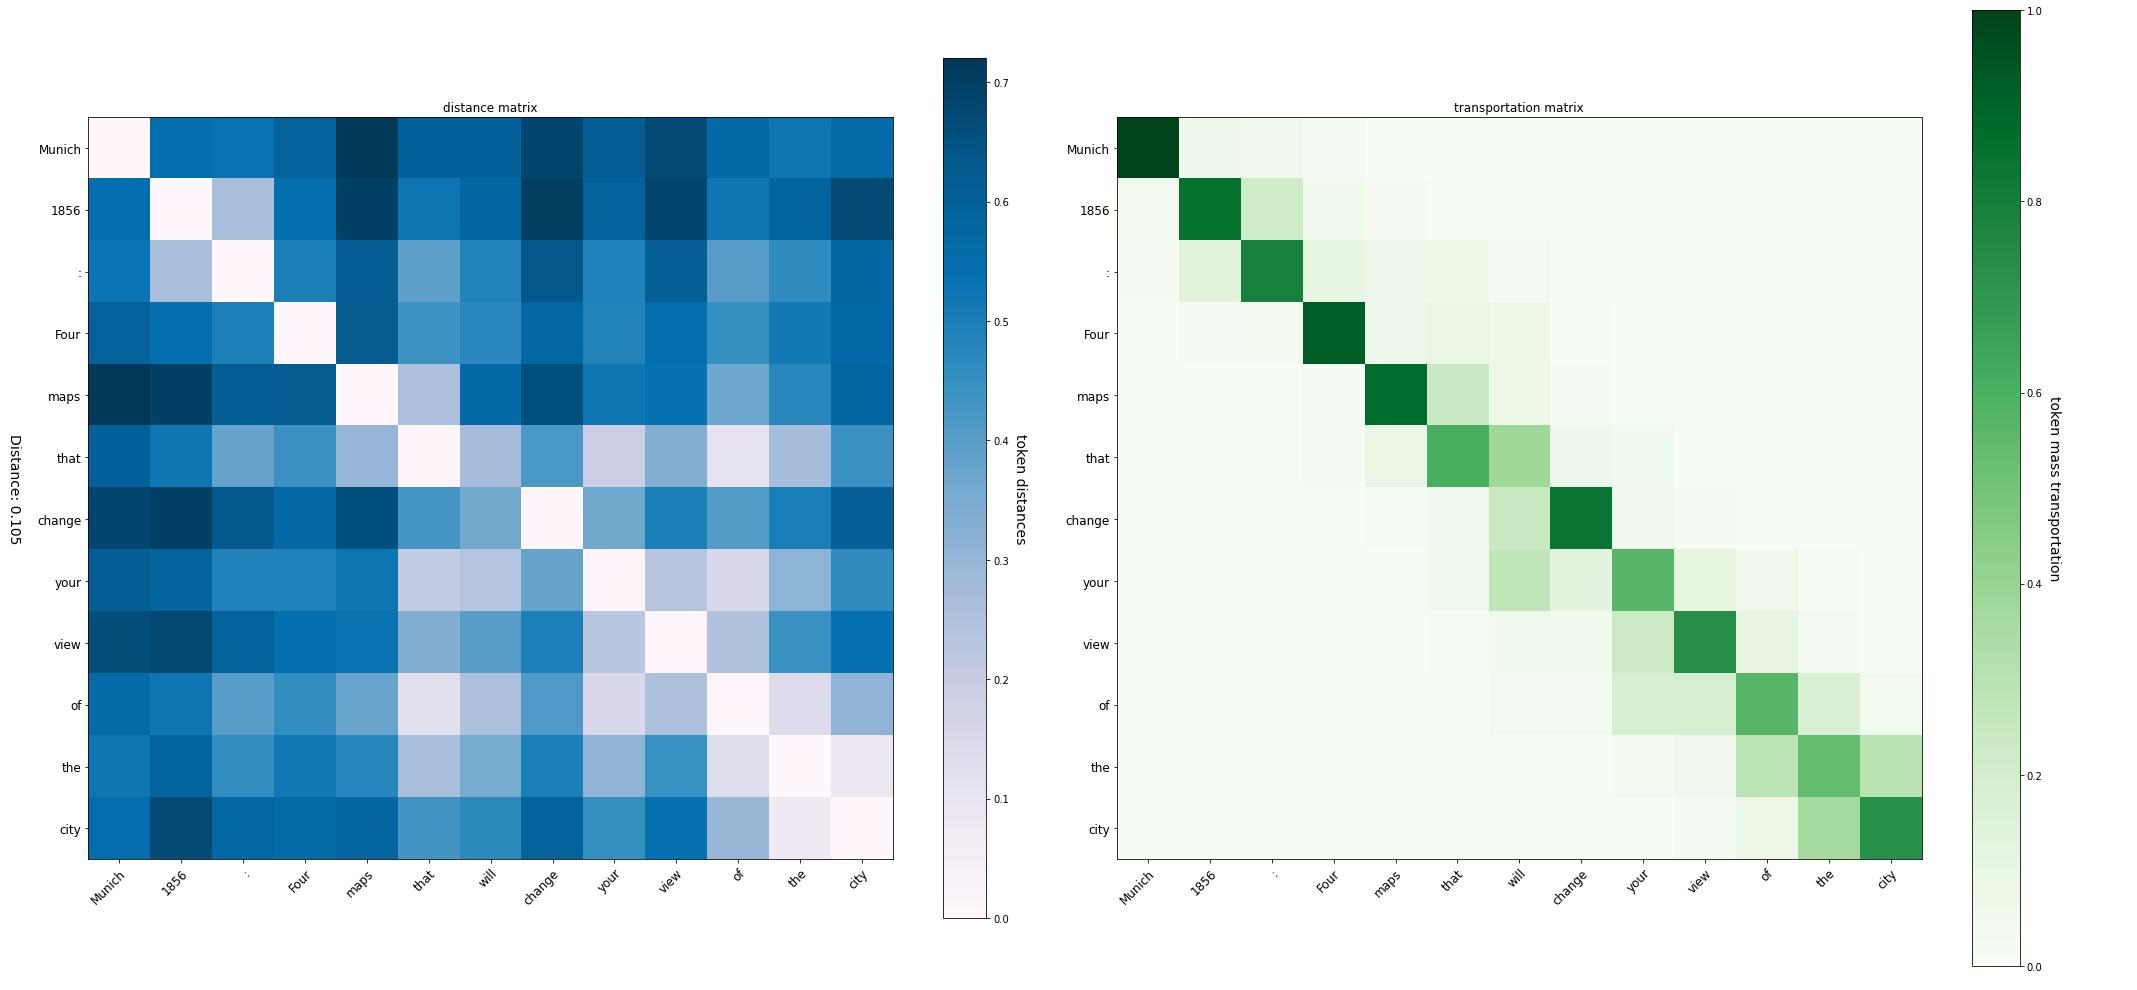

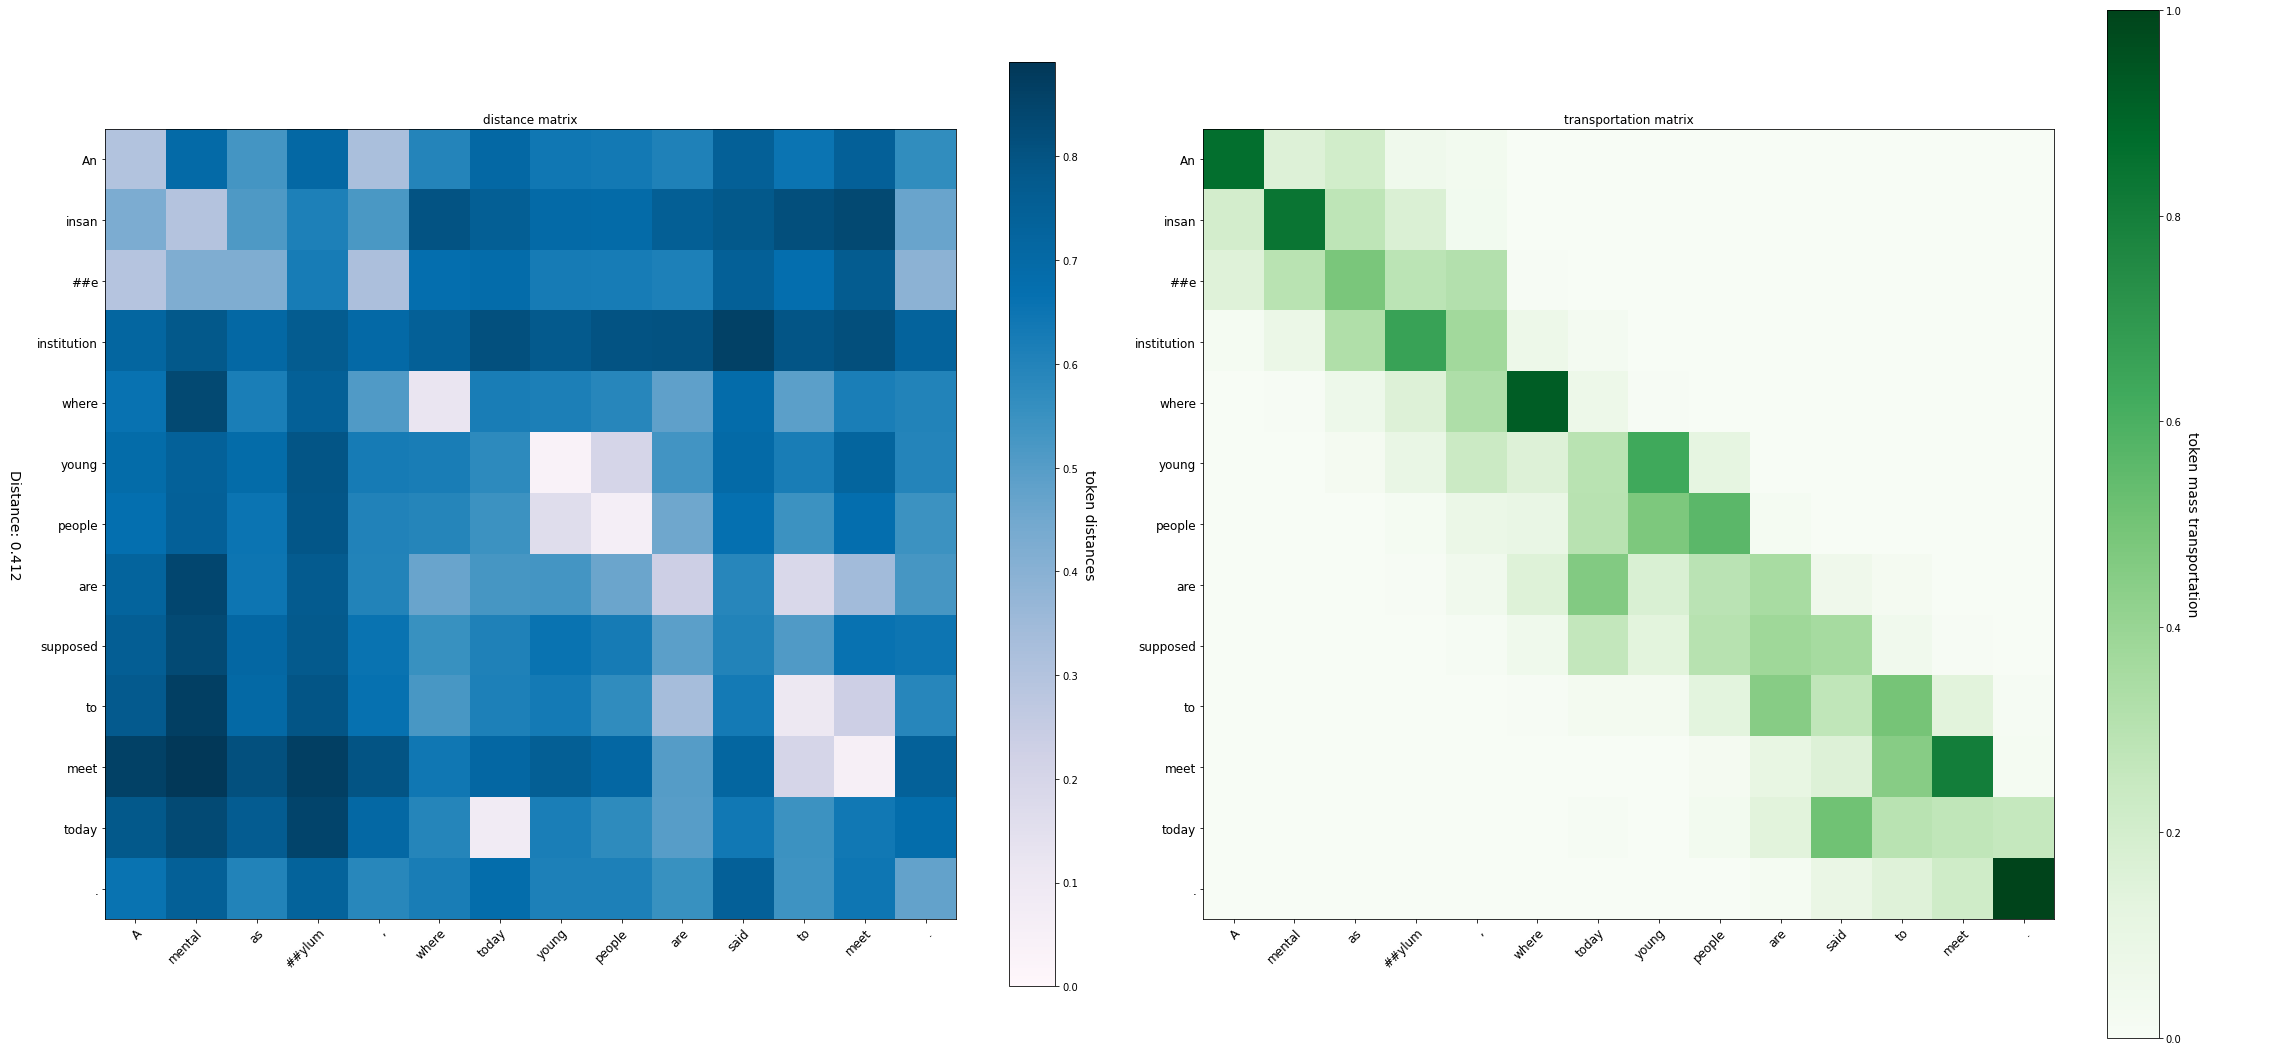

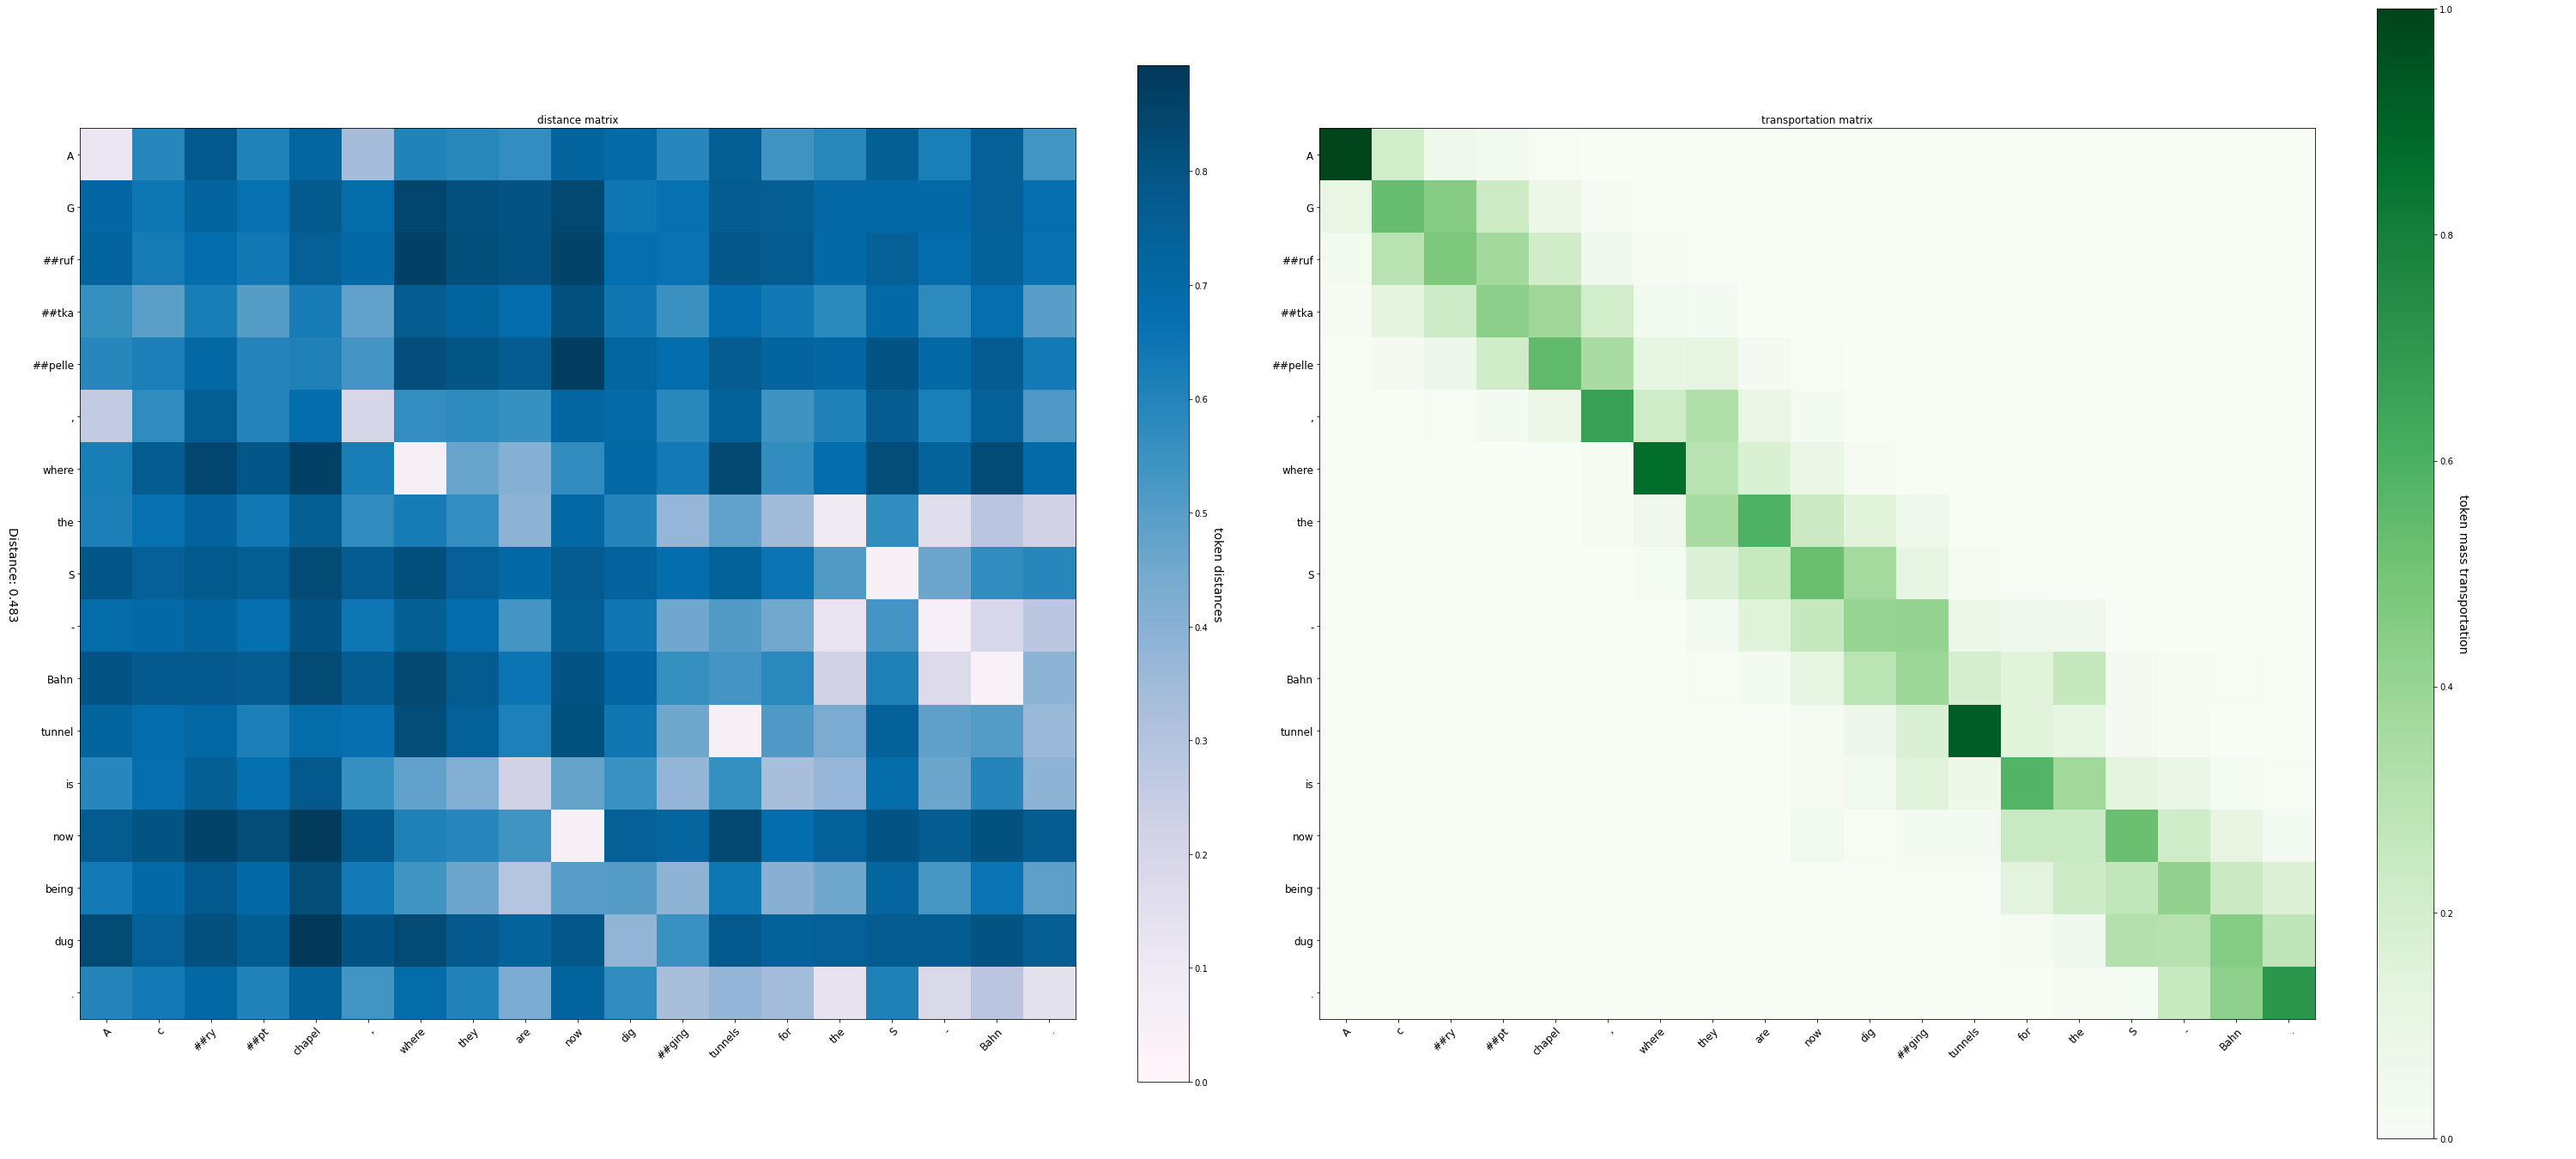

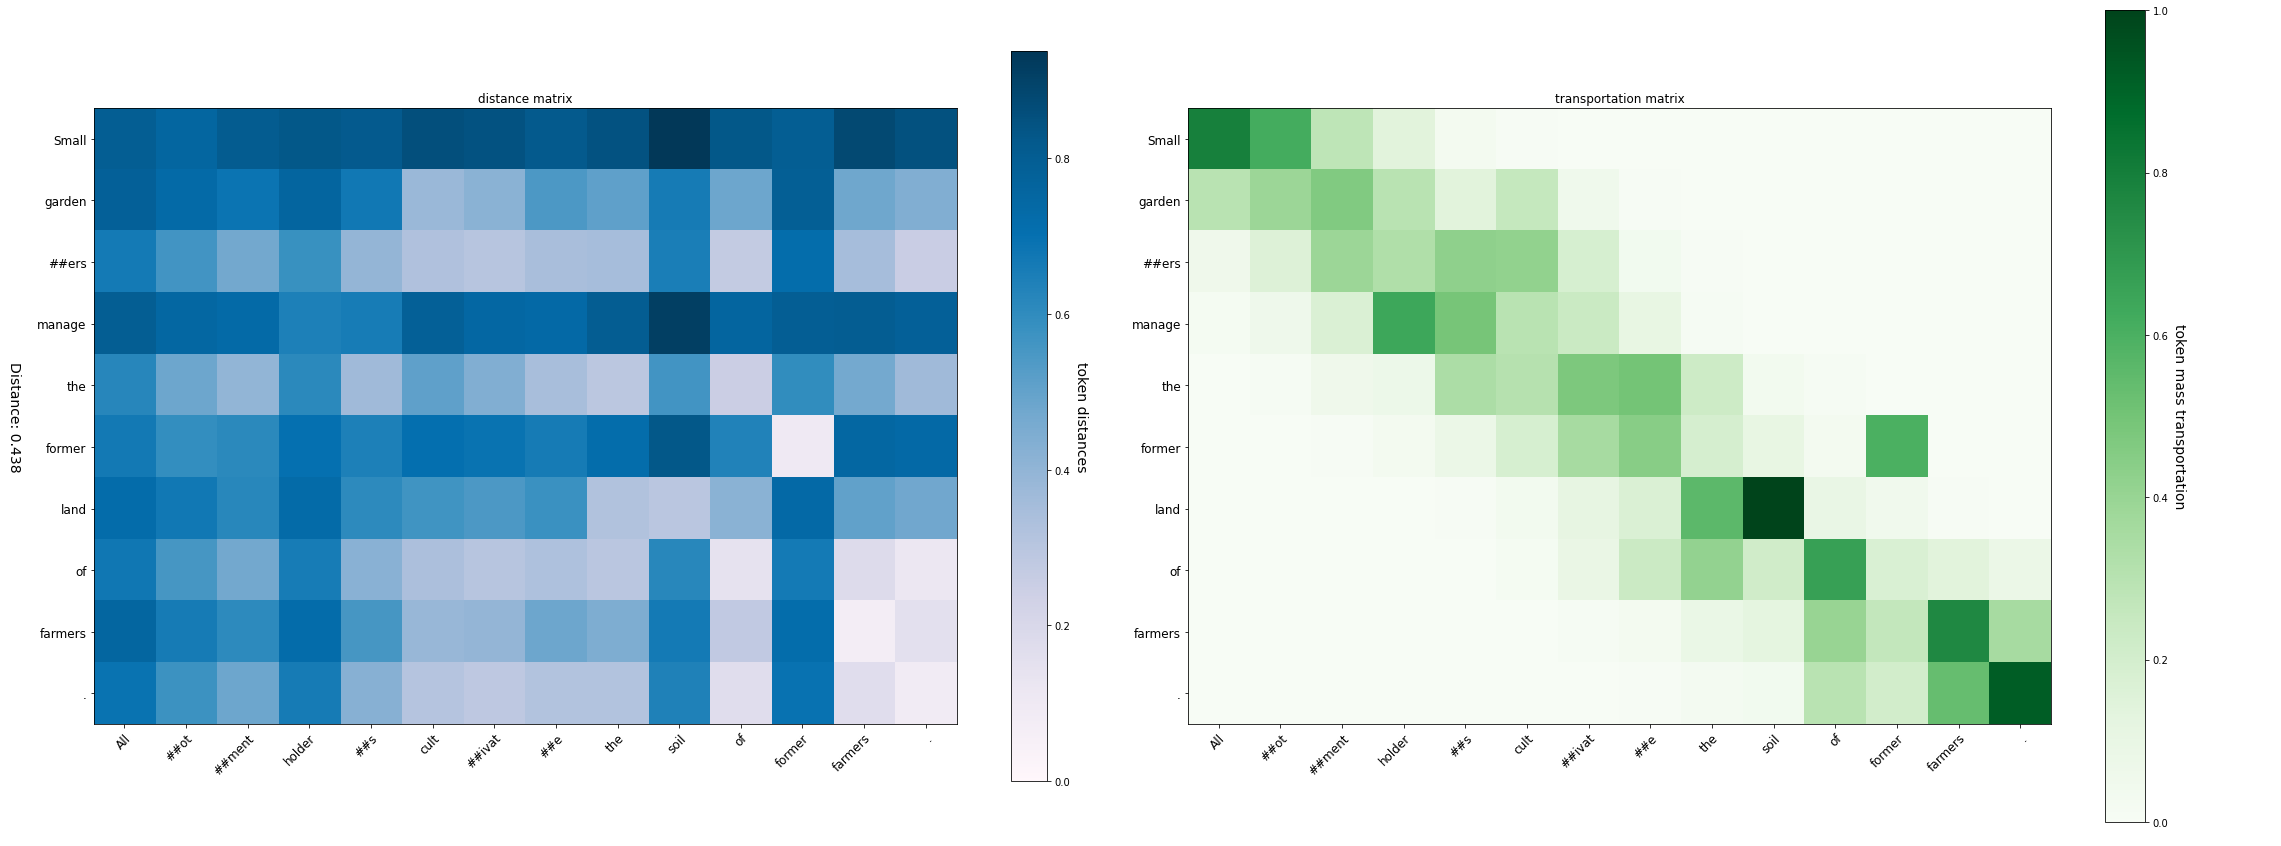

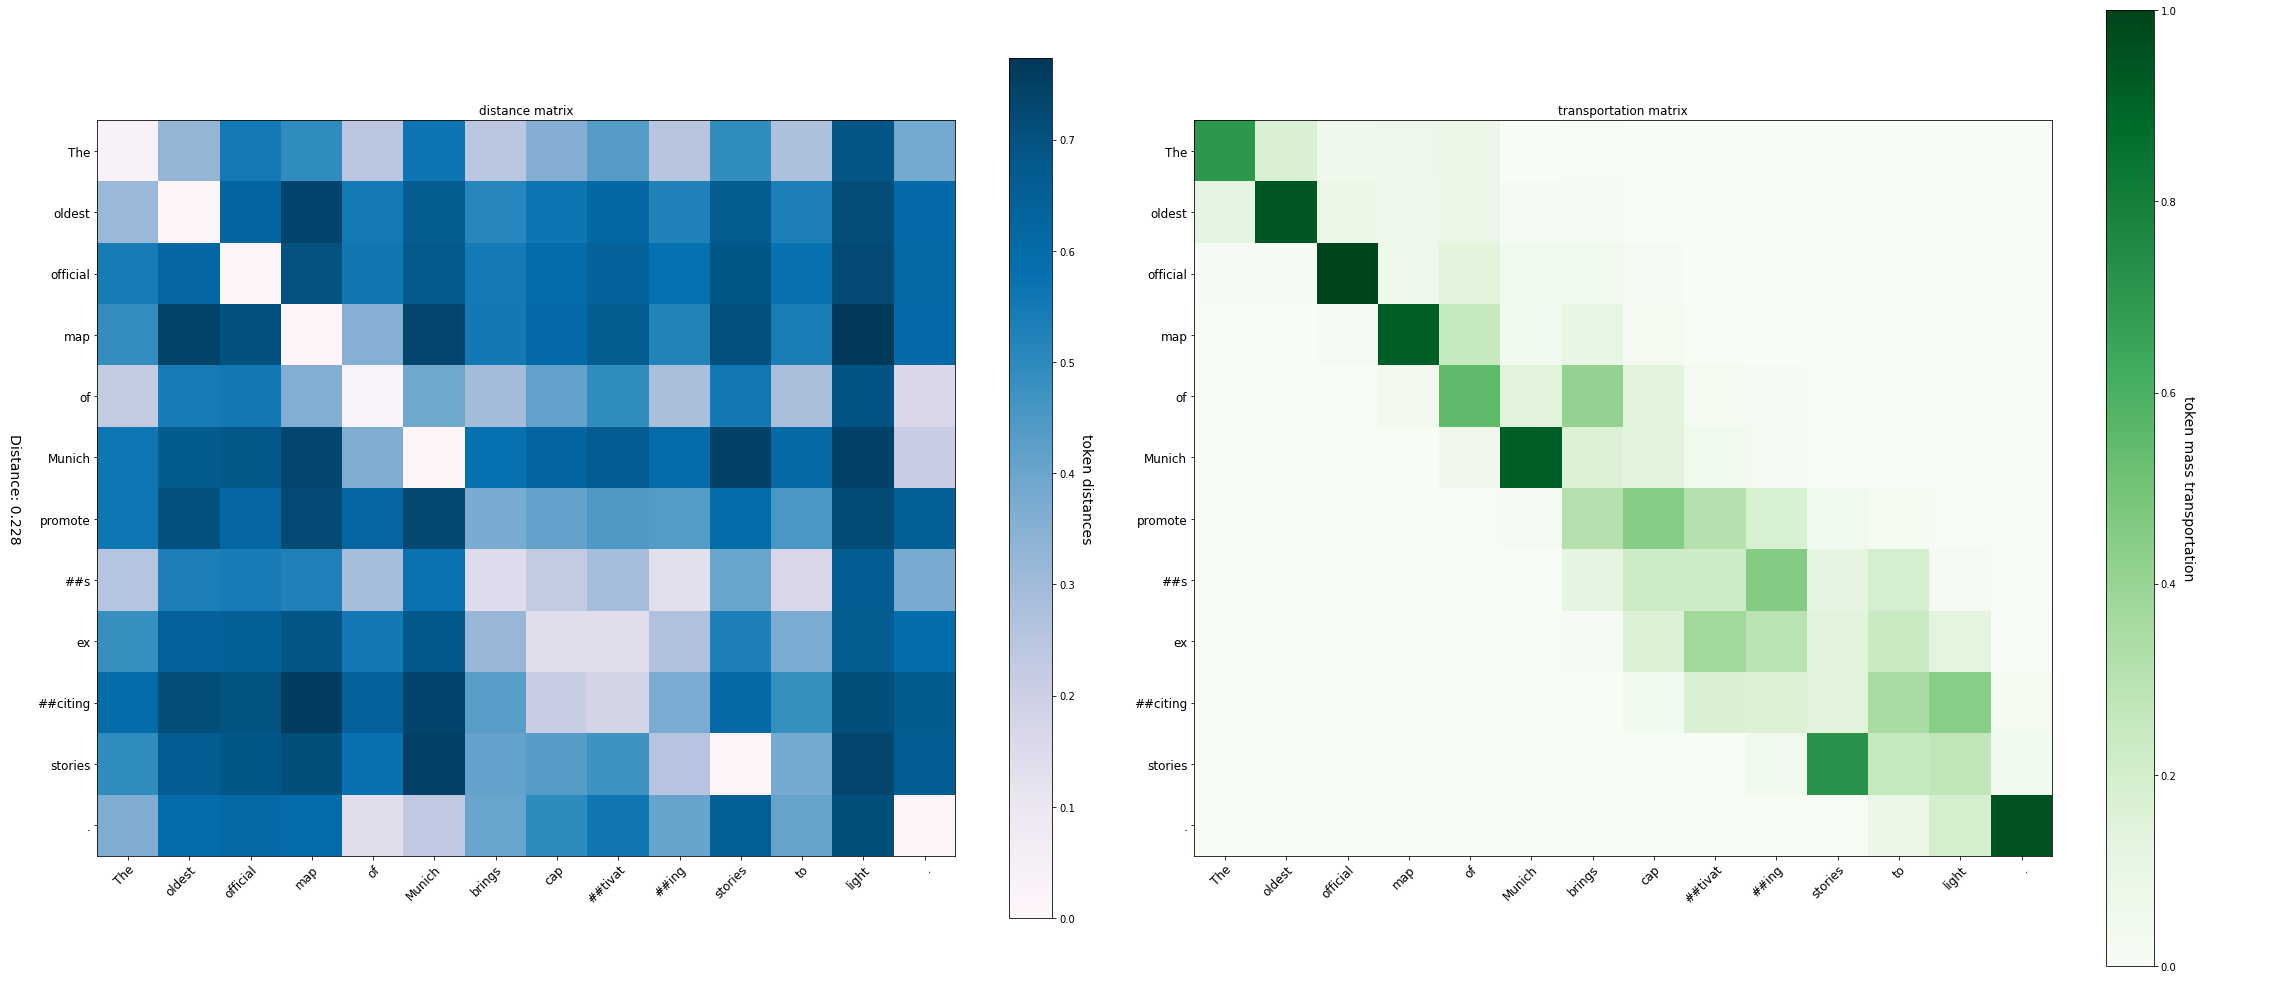

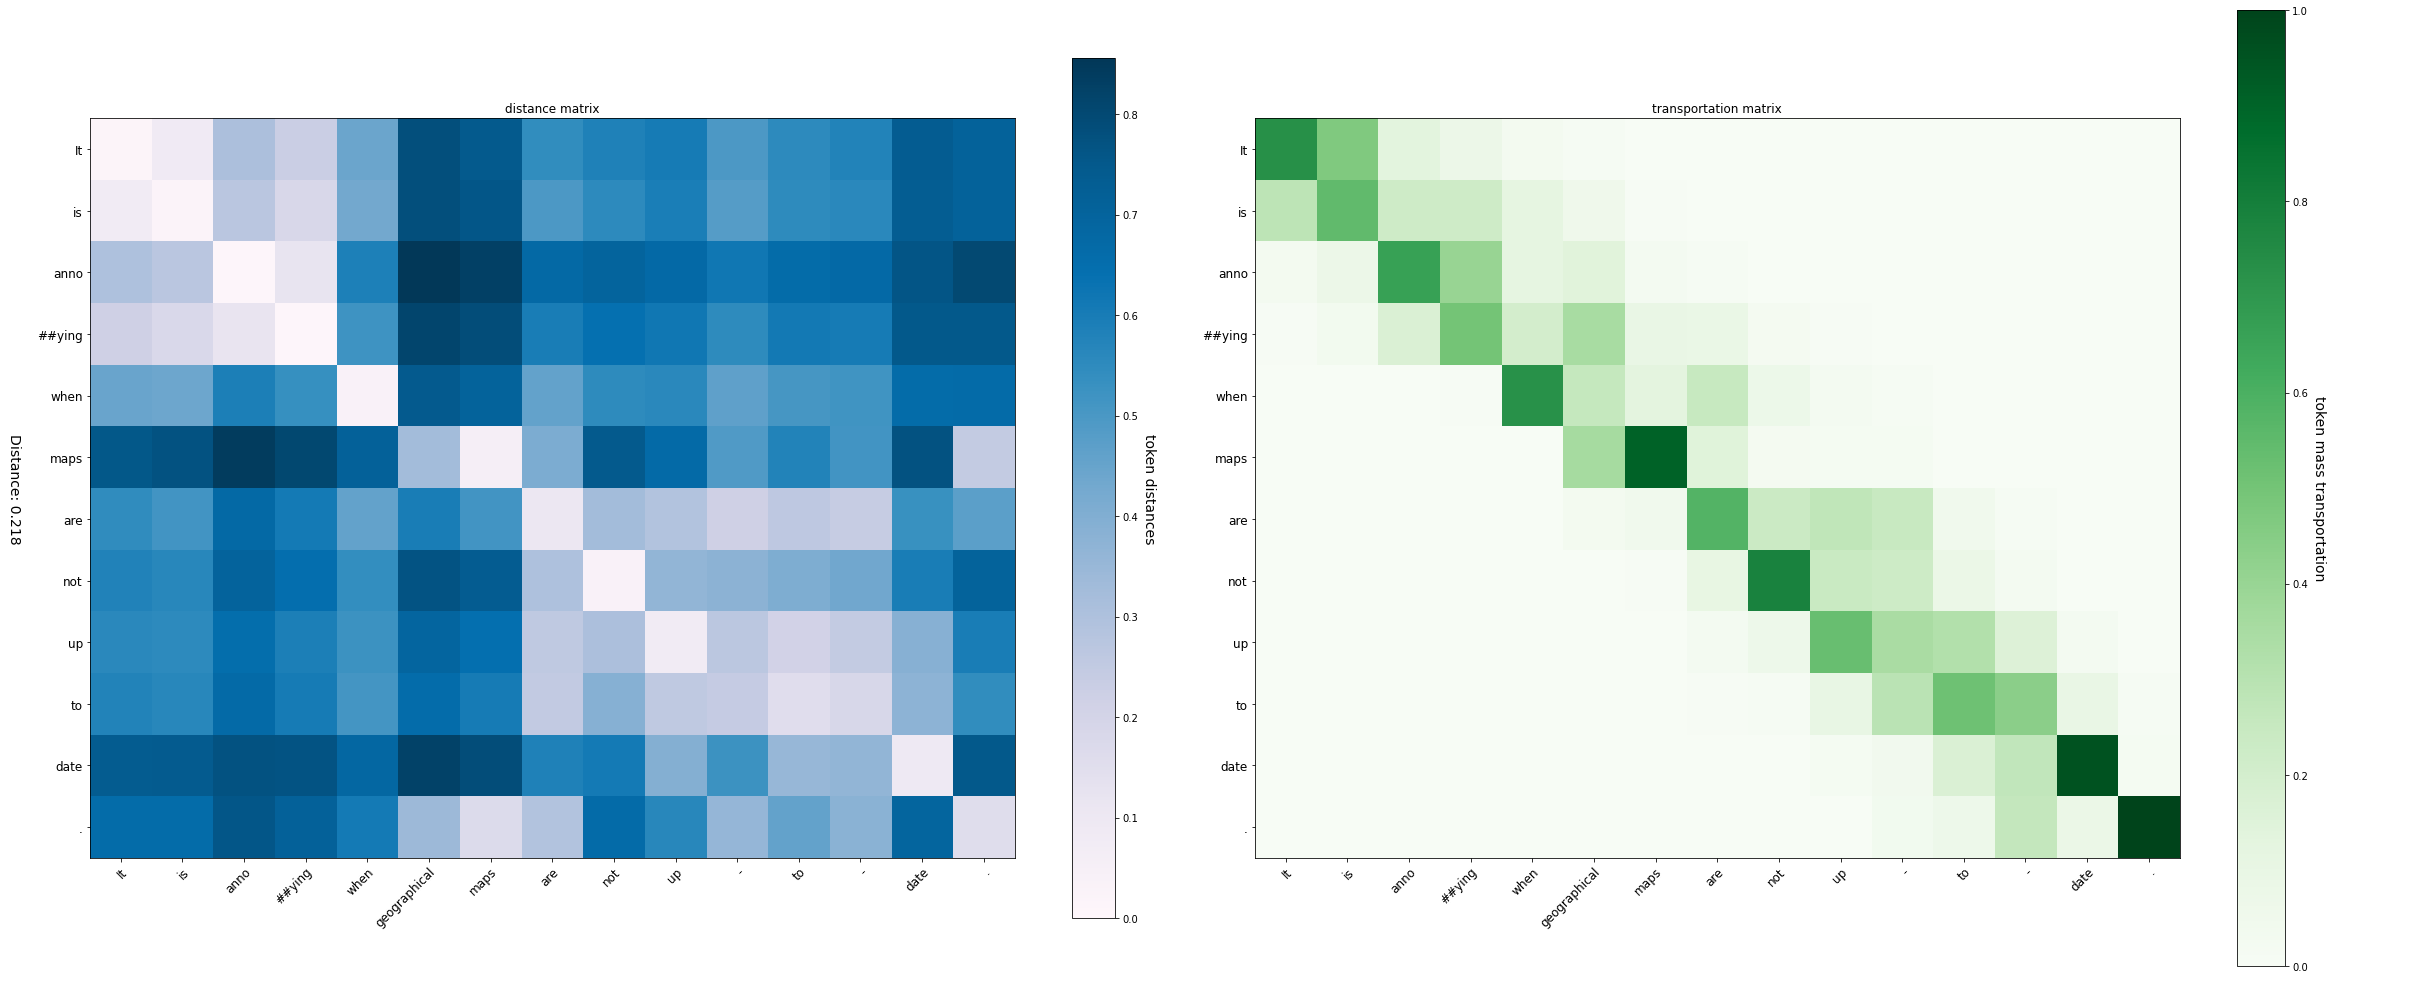

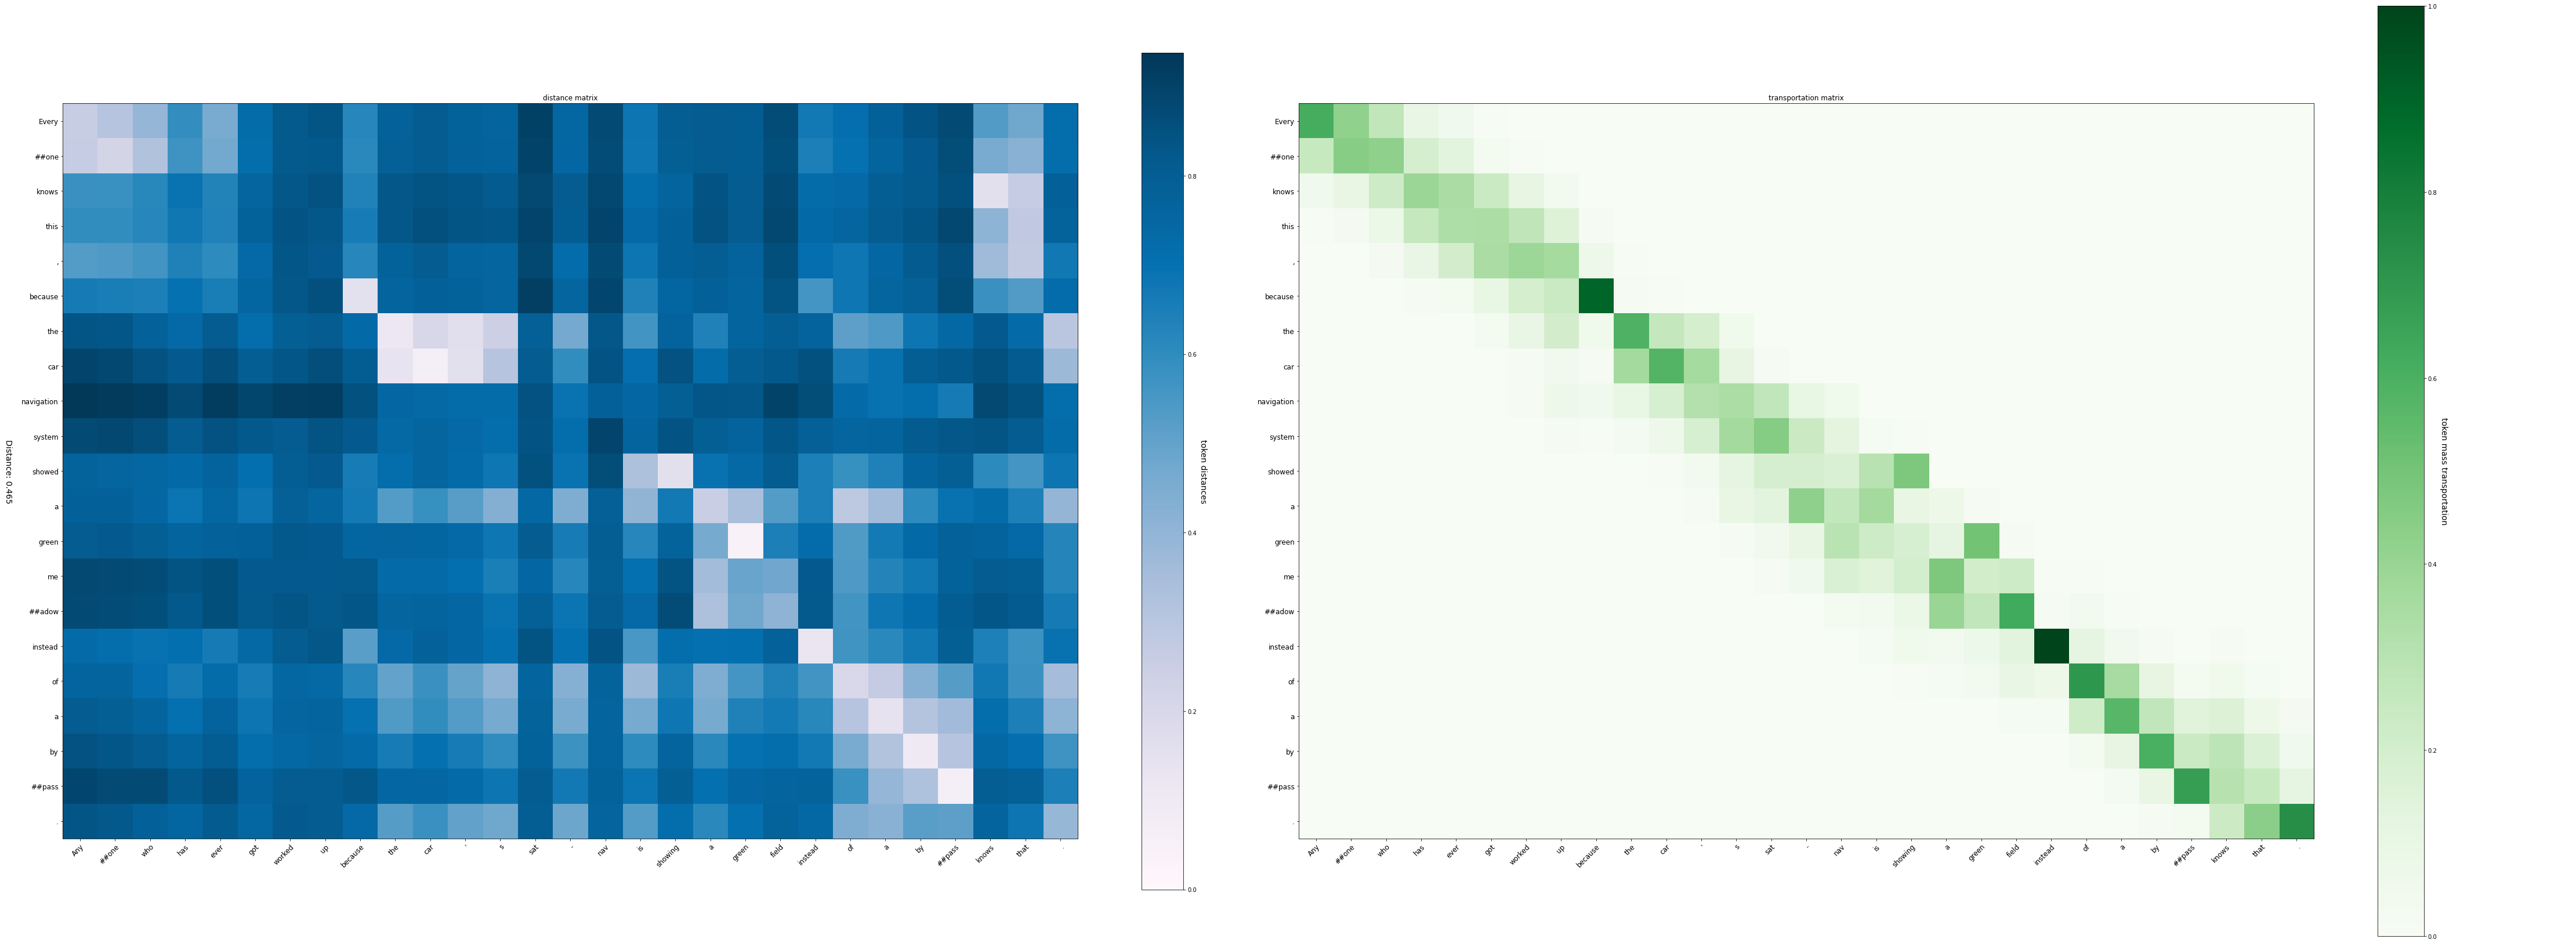

In [9]:
for idx, data in enumerate(dataloader):
    model_ids = data["model_id"]
    sources = data["source"]
    references = data["reference"]
    systems = data["system"]
    model.visualize(systems, references)
    if idx > 5:
        break